## Part.2 modelling EDA (exploratory data analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_absolute_error

In [2]:
dir_ = r'C:\Users\zcemg08\DataspellProjects\KTP_test\data\calibration.csv'
df = pd.read_csv(dir_)

In [3]:
df_blank = df[df['Sample']=='Blank']
df_pigment = df[df['Sample']=='S1']

In [4]:
### Data for solvent only

df_blank = df_blank.groupby('Dilution').mean(numeric_only=True)
### data for pigment and solvent
df_pigment = df_pigment.groupby('Dilution').mean(numeric_only=True)

In [5]:
## Let n, k are dilute values,i.e [1,2,4,...128]
## then An = E*c_n*l = E*50*2^(-log_{2}(n)*l --> An = Ak * [2^(-log_{2}(n)/2^(-log_{2}(k)] equation (1)
##  (1) holds true if Es are the same

In [6]:
## Find pigment A values form dataset
df_pigment_train = df_pigment-df_blank.values ### additive model for absorption, this file contains absorption values for pigment at different wavelengths and pigment concentration

1. Check consitance for equation 1

In [7]:
def multiplier(n,k):
    '''multiplier in equation 1'''
    return 2**(-math.log(n,2))/2**(-math.log(k,2))

Text(0, 0.5, 'A_k * multiplier(n,k)')

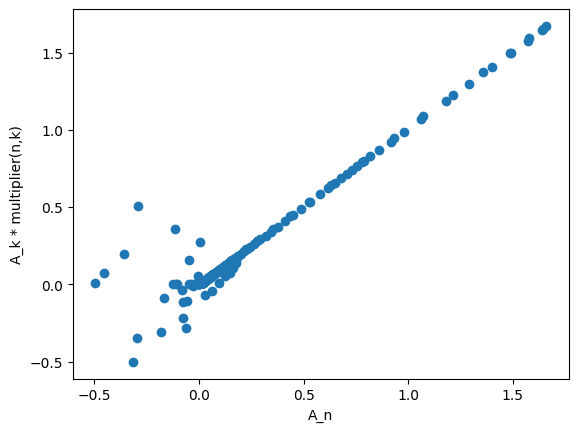

In [8]:
### Comparison between A pigment values for dilute = 1 and dilute = 2

n = 1
k = 2

plt.scatter(df_pigment_train[df_pigment_train.index==n].values,df_pigment_train[df_pigment_train.index==k].values*multiplier(n,k))
plt.xlabel('A_n')
plt.ylabel('A_k * multiplier(n,k)')

### For small wavelengths mathematical model A=E*c*L does not hold

2. Compare consistancy of mathematical model A = Ecl for all data and the sensetive range determined in Part1 300 <wavelength<600
   dilute values < 8 are exluded from investigation since there contribution to total A is negligible (Part 1 plot)


Method: compute mean absolute error between A_n and A_k_adjusted for n,k in [1,2,4,8]

In [9]:
#### All data

matrix = np.zeros((4,4))
for i,n in enumerate([1,2,4,8]):
    for j,k in enumerate([1,2,4,8]):
        An = df_pigment_train[df_pigment_train.index == n].values
        Ak_adjusted = df_pigment_train[df_pigment_train.index == k].values*multiplier(n,k)
        matrix[i,j] = mean_absolute_error(An,Ak_adjusted)


In [10]:
### Sensetive region determined in part 1 plot

WAVELENGTH = np.array([220 + 2*x for x in range(291)])
sensetive_region = np.where((WAVELENGTH>300) &(WAVELENGTH<600))[0]
df_sensetive = df_pigment_train.iloc[:,sensetive_region]

matrix2 = np.zeros((4,4))
for i,n in enumerate([1,2,4,8]):
    for j,k in enumerate([1,2,4,8]):
        An = df_sensetive[df_sensetive.index == n].values
        Ak_adjusted = df_sensetive[df_sensetive.index == k].values*multiplier(n,k)
        matrix2[i,j] = mean_absolute_error(An,Ak_adjusted)

In [11]:
print('mean of all computed erors between (An,Ak adjusted) for all data ={}, for sensetive data ={}'.format(np.mean(matrix),np.mean(matrix2)))

mean of all computed erors between (An,Ak adjusted) for all data =0.017191052763459343, for sensetive data =0.004689370106263984


In [12]:
print('max of all computed erors between (An,Ak adjusted) for all data ={}, for sensetive data ={}'.format(np.max(matrix),np.max(matrix2)))

max of all computed erors between (An,Ak adjusted) for all data =0.083618556701031, for sensetive data =0.024794183445190156


Conclusion: mathematical model A = EcL is much more applicable to waves between 300 and 600 then all waves range
Therefore E values will be determined for waves in that sensetive range